In [4]:
import numpy as np

class Perceptron:
    """パーセプトロン分類器
    パラメータ    
    eta: 学習率
    n_iter: 訓練回数
    random_state: 乱数シード
    
    属性
    w_: 適合後の重み
    b_: 適合後のバイアス
    errors_: 各エポックの誤分類数
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """訓練データの学習
        パラメータ numpy配列
        X: shape = [n_examples, n_features]
         n_examplesは訓練データ数, n_featuresは特徴量の個数
        y: shape = [n_exapmles] 
        
        戻り値:self
        """
        rgen = np.random.RandomState(self.random_state) # np.random_randomStateは乱数生成器, self.random_stateでシード値設定
        # _は学習によって得られる値を指す
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # 平均0, 分散0.01の正規分布で重みを初期化
        self.b_ = np.float_(0.) # バイアスの初期化, NumPy型にそろえるための記法
        self.errors_ = []
        for _ in range(self.n_iter): # n_iterの数だけ学習を繰り返す
            errors = 0
            for xi, target in zip(X, y): #重みの更新
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                #深層学習のチェーンルールの式のパーセプトロン(離散型)バージョンになってる
                errors += int(update != 0.0) # 誤差を追加
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        # 総入力を計算
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        #予測を返す
        return np.where(self.net_input(X) >= 0.0, 1, -1) # where(条件, 条件を満たすなら, 満たさないなら)
    
                
        

R: 15.6896
gamma: 0.4080
k_limit: 1478.60
k_real: 15
実証成功


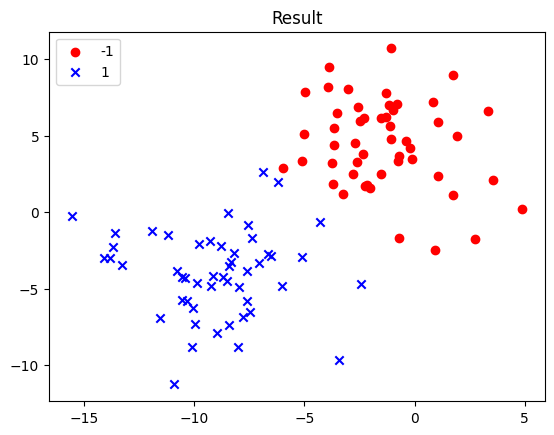

In [5]:
# パーセプトロン収束定理の実証(線形分離可能)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC


X, y = make_blobs(n_samples=100, centers=2, random_state=1, cluster_std=3.0)

y = np.where(y==0, -1, 1)
# データの最大ノルム
R = np.max(np.linalg.norm(X, axis=1))

# マージンの計算
# svmはマージンの最大化を行うため応用できる
svm = SVC(kernel='linear', C=1000) #Cを大きくしてバイアスを減らす(ハードマージン)
svm.fit(X, y)

# svmの重みノルムの逆数がマージンになる
w_norm = np.linalg.norm(svm.coef_)
gamma = 1 / w_norm

# 理論上の更新回数の上限
k_limit =(R /gamma) ** 2

print(f"R: {R:.4f}")
print(f"gamma: {gamma:.4f}")
print(f"k_limit: {k_limit:.2f}")

# パーセプトロンの学習
ppn = Perceptron(eta=1.0, n_iter=100, random_state=1)
ppn.fit(X, y)

# 実際の更新回数
k_real = sum(ppn.errors_)

print(f"k_real: {k_real}")

if (k_real < k_limit):
    print("実証成功")
else:
    print("実証失敗")
    
# データのプロット
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='-1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='1')

plt.title('Result')
plt.legend(loc='upper left')
plt.savefig('result_plot_std3.0.png', dpi=300)
plt.show()

R: 17.7140
gamma: 1.8799
k_limit: 88.79
k_real: 842
実証失敗


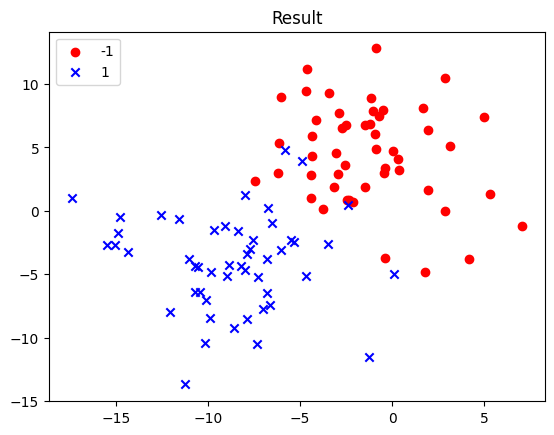

In [ ]:
# パーセプトロン収束定理の実証(線形分離不可)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC


X, y = make_blobs(n_samples=100, centers=2, random_state=1, cluster_std=4.0)

y = np.where(y==0, -1, 1)
# データの最大ノルム
R = np.max(np.linalg.norm(X, axis=1))

# マージンの計算
# svmはマージンの最大化を行うため応用できる
svm = SVC(kernel='linear', C=1000) #Cを大きくしてバイアスを減らす(ハードマージン)
svm.fit(X, y)

# svmの重みノルムの逆数がマージンになる
w_norm = np.linalg.norm(svm.coef_)
gamma = 1 / w_norm

# 理論上の更新回数の上限
k_limit =(R /gamma) ** 2

print(f"R: {R:.4f}")
print(f"gamma: {gamma:.4f}")
print(f"k_limit: {k_limit:.2f}")

# パーセプトロンの学習
ppn = Perceptron(eta=1.0, n_iter=100, random_state=1)
ppn.fit(X, y)

# 実際の更新回数
k_real = sum(ppn.errors_)

print(f"k_real: {k_real}")

if (k_real < k_limit):
    print("実証成功")
else:
    print("実証失敗")
    
# データのプロット
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='-1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='1')

plt.title('Result')
plt.legend(loc='upper left')
plt.savefig('result_plot_std4.0.png', dpi=300)
plt.show()

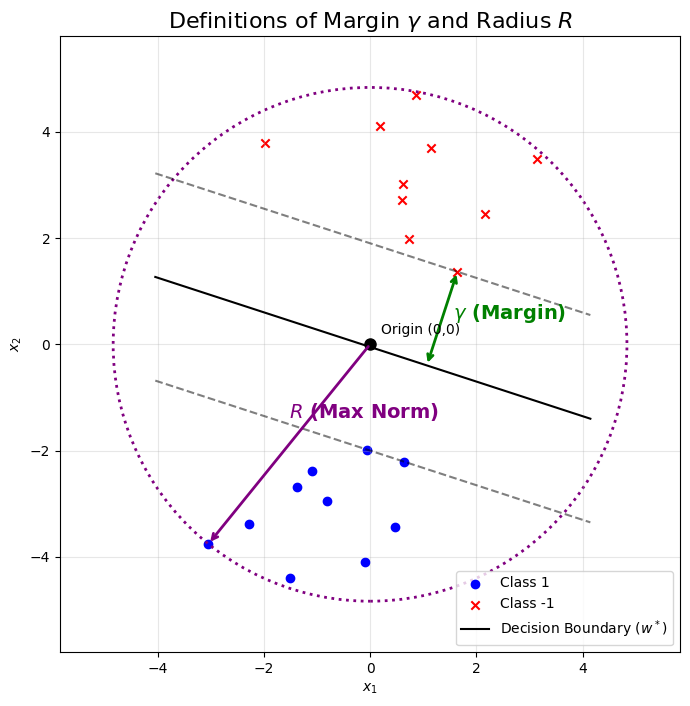

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# 1. データの準備（あえて少し離して見やすくする）
X, y = make_blobs(n_samples=20, centers=2, random_state=6, cluster_std=1.0)
X = X - X.mean(axis=0)
y = np.where(y == 0, -1, 1)

# 2. マージンγを計算するためにSVMを使う（概念図用）
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_[0]

# 3. 最大ノルム R の計算
norms = np.linalg.norm(X, axis=1)
max_norm_idx = np.argmax(norms)
R = norms[max_norm_idx]
farthest_point = X[max_norm_idx]

# --- プロット開始 ---
plt.figure(figsize=(8, 8))

# データ点のプロット
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='blue', marker='o', label='Class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], c='red', marker='x', label='Class -1')

# 決定境界 (w*x + b = 0) の描画
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0] * xx + b) / w[1]
plt.plot(xx, yy, 'k-', label='Decision Boundary ($w^*$)')

# マージンの描画 (サポートベクターを通る線)
margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up   = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin
plt.plot(xx, yy_down, 'k--', alpha=0.5)
plt.plot(xx, yy_up, 'k--', alpha=0.5)

# ★マージン γ の可視化（矢印）
# 決定境界上の点と、サポートベクターを結ぶ
sv = clf.support_vectors_[0]
proj_dist = (np.dot(w, sv) + b) / np.linalg.norm(w) # 符号付き距離
proj_point = sv - proj_dist * (w / np.linalg.norm(w)) # 射影点

plt.annotate('', xy=sv, xytext=proj_point,
             arrowprops=dict(arrowstyle='<->', color='green', lw=2))
plt.text((sv[0]+proj_point[0])/2 + 0.2, (sv[1]+proj_point[1])/2, 
         r'$\gamma$ (Margin)', color='green', fontsize=14, fontweight='bold')


# ★最大ノルム R の可視化（円と矢印）
# 原点(0,0)のプロット
plt.plot(0, 0, 'ko', markersize=8)
plt.text(0.2, 0.2, 'Origin (0,0)', fontsize=10)

# 半径Rの円を描く
circle = plt.Circle((0, 0), R, color='purple', fill=False, linestyle=':', linewidth=2)
plt.gca().add_patch(circle)

# 原点から最も遠い点への矢印
plt.annotate('', xy=farthest_point, xytext=(0, 0),
             arrowprops=dict(arrowstyle='->', color='purple', lw=2))
plt.text(farthest_point[0]/2, farthest_point[1]/2 + 0.5, 
         r'$R$ (Max Norm)', color='purple', fontsize=14, fontweight='bold')


# グラフの体裁
plt.axis('equal') # アスペクト比を1:1にして歪みをなくす
plt.xlim(-R-1, R+1)
plt.ylim(-R-1, R+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Definitions of Margin $\gamma$ and Radius $R$', fontsize=16)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# 保存
plt.savefig("concept_gamma_R.png", dpi=300)
plt.show()

In [7]:
# 二次元決定境界の可視化
from matplotlib.colors import ListedColormap # カラーマップを自作するため

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # unique(y) はyの値の種類数を返す
    
    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 図を塗りつぶすために縦横それぞれ1メモリ0.02の大きさの区画を作る
    
    # 各点の分類を予測
    lab = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T) # revel→行列を横一列の配列に、np.array→2×n行列に、T→転置
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    lab = lab.reshape(xx1.shape)
    # グリッドポイントの境界線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap) #(x座標,y座標,高さ(0,1),透明度,カラーマップ) 等高線の気分で引いている
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)): # enumerate インデックス番号と要素
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')



In [11]:
class AdalineSGD:
    """ADAptive LInear NEuron分類器
    パラメータ
    -----------
    eta : float
      学習率
    n_iter : int 
      訓練データの訓練回数
    shuffle : bool (デフォルト: True)
      Trueの場合は循環を回避するためにエポックごとに訓練データをシャッフル
    random_state : int
      乱数シード
      
    属性
    -------
    w_ : 一次元配列
      適合後の重み
    b_ : スカラー
      適合後の倍亜種ニット
    losses_ : リスト
      各エポックで全ての訓練データの平均を求めるMSE損失関数
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False # 重みの初期化フラグはFalseに設定
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle: # 指定があればシャッフル
                X, y = self._shuffle(X, y)
                losses = []
                for xi, target in zip(X, y):
                    # 特徴量xiと目的変数targetを使った重みの更新と損失の計算
                    losses.append(self._update_weights(xi, target))
                # 訓練データの平均損失の計算
                avg_loss = np.mean(losses)
                # 平均損失を格納
                self.losses_.append(avg_loss)
        return self
    
    
    def partial_fit(self, X, y):
        """重みを再初期化することなく訓練データに適合させる"""
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        # 目的変数yの要素数が2以上の場合は各訓練データの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1: # ravel(): 2次元配列を1次元配列に
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        # 要素数が1の場合は訓練データ全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X, y)
        return self                    
                
    def _shuffle(self, X, y):
        """訓練データをシャッフル"""
        r = self.rgen.permutation(len(y)) # インデックスの配列を生成
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを乱数で初期化"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True # 一度初期化したので
        
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を使って重みを更新"""
        output = self.activation(self.net_input(xi)) # 活性化関数の出力を計算
        error = (target - output)                    # 誤差
        self.w_ += self.eta * 2.0 * xi * (error)     # 重みの更新
        self.b_ += self.eta * 2.0 * error            # バイアスの更新
        loss = error**2                              # 損失値を計算
        return loss
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)    
    

In [12]:
# データの標準化
X_std = np.copy(X)

X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

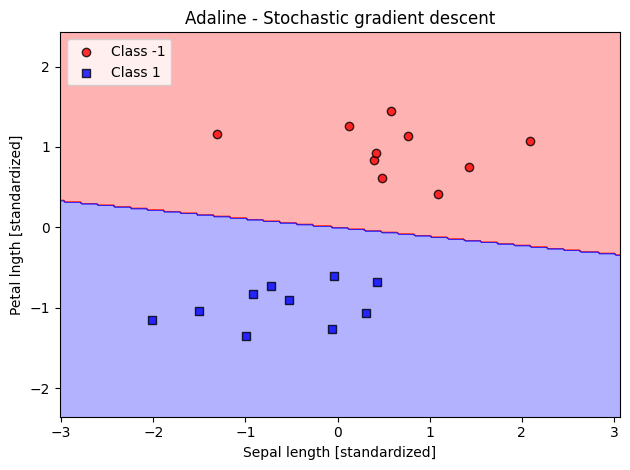

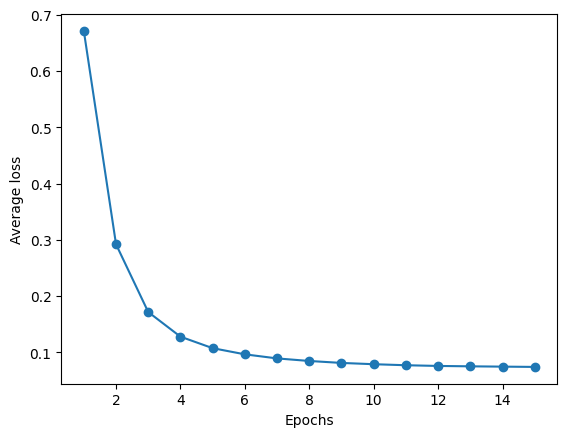

In [13]:
# 確率的勾配降下法によるADALINEの学習
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)

# モデルへの適合
ada_sgd.fit(X_std, y)

# 決定領域のプロット
plot_decision_regions(X_std, y, classifier=ada_sgd)

# 設定
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal lngth [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

# 表示
plt.show()

# エポックと損失値の折れ線グラフのプロット
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')

# 軸のラベル設定
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout
plt.show()

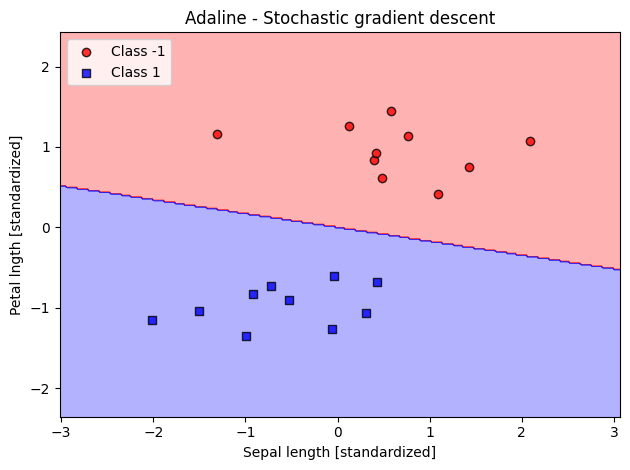

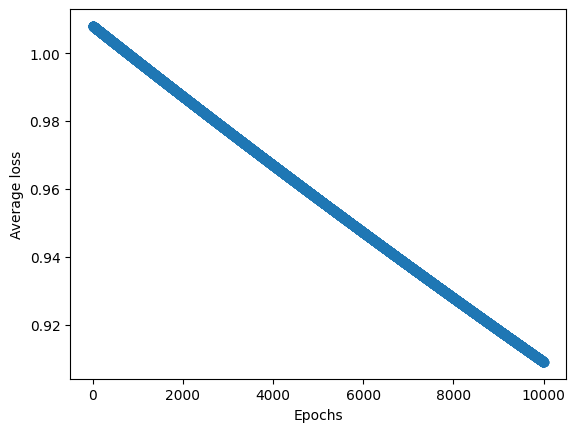

In [17]:
# 確率的勾配降下法によるADALINEの学習
ada_sgd = AdalineSGD(n_iter=10000, eta=0.0000001, random_state=1)

# モデルへの適合
ada_sgd.fit(X_std, y)

# 決定領域のプロット
plot_decision_regions(X_std, y, classifier=ada_sgd)

# 設定
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal lngth [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

# 表示
plt.show()

# エポックと損失値の折れ線グラフのプロット
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')

# 軸のラベル設定
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout
plt.show()

## 学習率変えても決定領域は変わらないね